In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 8s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [10]:
base_dir = '/Users/Davidaarhus/Documents/CPSC_393/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [11]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [12]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [14]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [16]:
from keras import models
from keras import layers
from keras import optimizers

In [17]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc'])

In [19]:
history = model.fit(train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6229 - acc: 0.6510 - val_loss: 0.4457 - val_acc: 0.8350
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.4201 - acc: 0.8045 - val_loss: 0.3548 - val_acc: 0.8730
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3617 - acc: 0.8405 - val_loss: 0.3219 - val_acc: 0.8750
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3219 - acc: 0.8650 - val_loss: 0.2958 - val_acc: 0.8860
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2851 - acc: 0.8840 - val_loss: 0.2859 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2658 - acc: 0.8885 - val_loss: 0.2679 - val_acc: 0.8970
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2540 - acc: 0.8960 - val_loss: 0.2603 - val_acc: 0.9020
Epoch 8/30
200

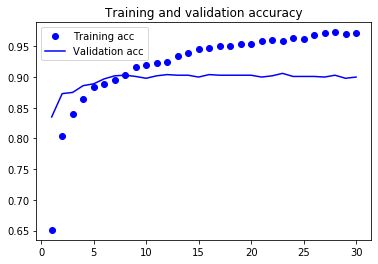

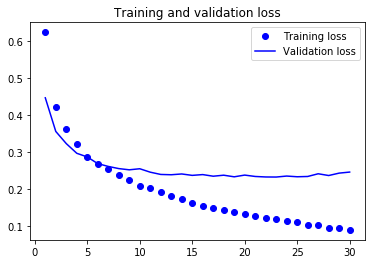

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
from keras import models
from keras import layers

In [24]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

Found 1000 images belonging to 2 classes.


In [29]:
#this runs the model and produces a more accurate validation accuracy

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=30,
#     validation_data=validation_generator,
#     validation_steps=50)

In [30]:
conv_base.trainable = True

In [31]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [32]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-5),
    metrics=['acc'])

In [35]:
# this model is how you fine-tine it, by freezing and unfreezing layers

# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=100,
#     epochs=100,
#     validation_data=validation_generator,
#     validation_steps=50)